# Content
## **Classification Metrics**
- **Recap** (duration: 5 mins)
 - [Negative class](https://www.scaler.com/hire/test/problem/18248/)
 - [Not a Fan of Recall](https://www.scaler.com/hire/test/problem/20967/)
 - [Calculate F_Beta](https://www.scaler.com/hire/test/problem/25430/)

- **Sensitivity and Specificity** (Duration: 15 mins)
 - [TPR vs FPR](https://www.scaler.com/hire/test/problem/16543/)
- **ROC** (duration: 20 mins)
 - [ROC](https://www.scaler.com/hire/test/problem/25057/)
 - [How will ROC change?](https://www.scaler.com/hire/test/problem/17691/)
 - [AU-ROC implementation](https://www.scaler.com/hire/test/problem/25037/)


- **AUC** (duration: 20 mins)

- **Precision Recall Curve** (duration: 10 mins)
 - [Two classification models](https://www.scaler.com/hire/test/problem/25059/)

## **Imbalance Data**

- **What is imbalanced data?**(duration:5 mins)

- **Imbalance data with Log-reg** (duration:15 mins)

- **Handling Imbalance Data**(duration:40 mins)
    - Class Weights (duration:20 mins)
     - [Mutli-Class Weights](https://www.scaler.com/hire/test/problem/25651/)
     - [Class Weights](https://www.scaler.com/hire/test/problem/25646/)
    - Undersampling (duration: 5 mins)
     - [Undersampling Good Practices](https://www.scaler.com/hire/test/problem/25432/)

    - Oversampling  (duration: 15 mins)

- **SMOTE (Synthetically Minority Oversampling Technique)** (duration: 25 mins)
 - [Sampling](https://www.scaler.com/hire/test/problem/18250/)
 - [Awful Dataset](https://www.scaler.com/hire/test/problem/20745/)
 - [Handle the situation!](https://www.scaler.com/hire/test/problem/17687/)
 - [Pseudo SMOTE](https://www.scaler.com/hire/test/problem/25650/)







#**Recap**

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/222/original/Screenshot_2023-08-08_at_11.36.16_AM.png?1691475401 width=700>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/224/original/Screenshot_2023-08-08_at_11.36.24_AM.png?1691475519 width=700>

# Spam vs Non-Spam: Business Case



You are working in Google and have a task to create an Email spam detection model

Here,
- **not spam** → Class 0
- **spam** → Class 1

<br>




**Note:** For simplicity, lets call:
-  Class 0 **Not Spam** as Negative Class
- and Class 1 **Spam** as Positive Class



Lets Load the data

Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: /content/Spam_finalData.csv
100% 1.64M/1.64M [00:00<00:00, 32.0MB/s]


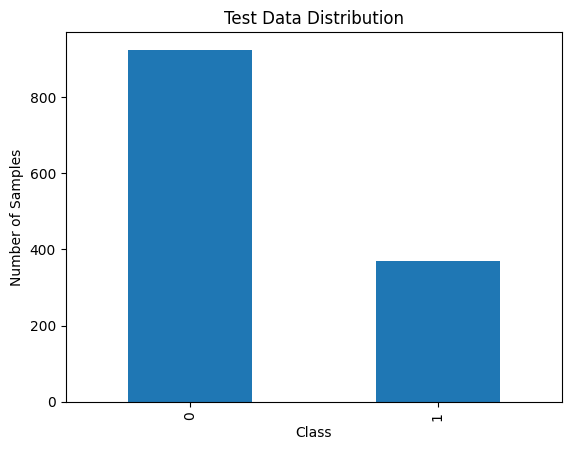

Training Data:(3878, 15),(3878,), Testing Data: (1293, 15),(1293,)


LogisticRegression()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt

dt = pd.read_csv('Spam_finalData.csv')




X_train,X_test,y_train,y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])

y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()


print(f'Training Data:{X_train.shape},{y_train.shape}, Testing Data: {X_test.shape},{y_test.shape}')





model = LogisticRegression()
model.fit(X_train,y_train)


# **Sensitivity**

Suppose we have **Fortis Hospital data** where:
- 100 patients are Cancerous (Class1)
- 900 patients are not-Cancerous (Class0)

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/225/original/Screenshot_2023-08-08_at_11.36.32_AM.png?1691475554 width=700>



<br>

In medical firms, **screening test are conducted**
- in order to **identify whether a patient carries the disease or not**

<br>



#### How would we want the screening test to perform like for cancerious patients?


Ans: We would want the screening test to:
- Correctly predict as many Cancer patients (TP ⇑)
- While keeping the misclassification of Cancer patients low (FN ⇓)

<br>

**note:** This want of having **TP high** and **FN low** from a screeing test, is called **sensitivity**




**quiz**

```
What to say when screening test identifies 92 Cancer patients out of 100?

a) test has high sensitivity
b) test has low sensitivity
c) test has no sensitivity
d) cannot be determined

```
**Correct Answer**
a) test has high sensitivity

#### Why is high Sensitivity important ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/226/original/Screenshot_2023-08-08_at_11.36.38_AM.png?1691475592 width=700>



Ans: Imagine if the screening test fails to identify 95 cancer patients:

- Due to **lack of treatments**, the cancer disease will spread
- and make the **conditions for the patient more severe**

<br>

Hence **high Sensitivity** of the screening test  becomes **crucial**:
- As the **consequences of failing to treat the disease worsens the patient's condition**



#### How to calculate Sensitivity using Confusion Matrix?



Ans: For a model to have high Sensitivity,
- TP ⇑
- FN ⇓

hence sensitivity can be interpreted as:
- $Sensitivity = \frac{TP}{TP+FN}$


**observe:**

The equation to define **Sensitivity is same as Recall**

<br>

**note:** Since **Sensitivity tracks the rate of TP**, it is also called as **True Positive Rate (TPR)**




#### What will happen if a model/Screeing test is "in-sensitive"?



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/227/original/Screenshot_2023-08-08_at_11.36.45_AM.png?1691475648 width=700>

Ans: It will cause  **FN to increase**:
- And as discussed worsen Cancer patient condition due to lack of treatment


<br>



#### How to measure the rate of change in FN ?



ans: It is calculated using **False Negative Rate (FNR)**:

 - $FNR  = 1 - Specificity  = 1  - \frac{TP}{TP+FN} = \frac{FN}{TP+FN}$


<br>

**note:** As these patients are missed by the model/screening test,  **FNR** is called **Miss Rate**




# **Specificity**

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/228/original/Screenshot_2023-08-08_at_11.36.52_AM.png?1691475687 width=700>


#### We talked how model have high TP but what about TN and FP ?
Ans: We would want the model to:
- Correctly predict as many Non-Cancer patients (TN ⇑)
- While keeping the misclassification of Non-Cancer patients low (FP ⇓)

**note:** This want of having **TN high** and **FP low** from a screeing test, is called **specificity**

<br>




#### Why is high Specificity important ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/229/original/Screenshot_2023-08-08_at_11.37.29_AM.png?1691475739 width=700>



ans: Imagine if the screening test identifies 600  Non-cancer patients as cancerous:

- This will cause fruitless treatments on these patients which are quite expensive
- Also will create a social Stigma, anxiousness, Stress to these patients

Hence, **Specificity becomes crucial**:
- In order to avoid unnecessary expensive treatments, medications , social stigma and anxiety for the patient


<br>

**observe**

**Specificity is basically Sensitivity** defined **for Negative Class (Class0)**


#### How to calculate Specificity using Confusion Matrix ?



Ans: As to have high Specificity:
- TN ⇑
- FP ⇓

Hence we can define Specificity as:

$Specificity = \frac{TN}{TN + FP}$

**Note:** As Sensitivity measures the rate of TP ,
- Specificity measures the rate of TN, hence also called as **True Negative Rate (TNR)**





#### What will happen if a model/Screeing test is "not-specific"?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/230/original/Screenshot_2023-08-08_at_11.37.41_AM.png?1691475799 width=700>



Ans: It will cause  **FP to increase**:
- And as discussed, resulting in more Non-Cancer patients(class0) to undego
 - irrelevant expensive treatments, anxiety and social stigma


<br>


#### How to measure the rate of change in FP ?




ans: AS **FNR** is used to measure change in FN , rate of change in FP  is calculated using **False Positive Rate (FPR)**:

 - $FPR  = 1 - Specificity  = 1  - \frac{FP}{TN+FP} = \frac{FP}{TN+FP}$








**quiz**

```
In a credit fraud detection system, which is more important?
a) Sensitivity
b) Specificity
c) both
```
**correct Answer**
c) both


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/044/106/original/Screenshot_2023-08-24_at_10.22.37_AM.png?1692852989 width=700>

# **ROC (Reciever Operating Characterstic Curve)**

#### Recall our model got a 88% F1score, what can be done to increase performance ?

Ans: Doing some hyperparameter tuning might help:
- Adding regularization

#### What if, adding regularization does not do major improvement in model, what can be the issue ?
Ans: Recall our Cancer patient example, where:
- We wanted to correctly classify cancer patients
- And for this, we used a threshold ($\tau$) of 0.4 instead of 0.5

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/231/original/Screenshot_2023-08-08_at_11.37.49_AM.png?1691475864 width=700>

#### How to ensure we select the correct threshold ?


Ans: For this, we will be doing 3 steps.




**Step1:** Remember, Logistic Regression **outputs probabilities [$ p = P(y=1|x)$ or $p =  P(y=0|x)$] before thresholding**




<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/232/original/Screenshot_2023-08-08_at_11.37.57_AM.png?1691475926 width=700>

-  Find the probablities for $p = P(y=1|x)$  and **sort  probabilities in descending order**

**Step2:** Set each probabilities as threshold ($\tau$) and find $\hat{y}$:


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/234/original/Screenshot_2023-08-08_at_11.38.06_AM.png?1691475976 width=700>


- After creating $\hat{y}$: find **TPR and FPR**
  - $TPR = \frac{TP}{TP+FN}$

  - $FPR = \frac{FP}{TN+FP}$


**Note:** $\hat{y} = 1 $ if $p \geq \tau$ , else $\hat{y} = 0$

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/235/original/Screenshot_2023-08-08_at_11.38.16_AM.png?1691476007 width=700>






<br>

**Step3:** After Step2, we will have **pairs of TPR and FPR values for each probabilities**:


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/237/original/Screenshot_2023-08-08_at_11.38.23_AM.png?1691476087 width=700>

- Now, we plot TPR (Y-axis) vs FPR (X-axis) for each threshold
- We **select the one threshold based on our problem**

<br>


**Note:** Since in our Spam classifier problem, we want FPR $\approx 0$
- We **pick that threshold** which has **high TPR and low FPR**

<br>


**observe**

The **plot TPR (Y-axis) vs FPR (X-axis)** for each threshold will **look like a curve**. This is called as **ROC (Reciever Operating Characteristic) curve**

- ROC term comes from electronics and radio engineering
- usually used in signal procressing







**Quiz**

```
What will be time complexity, when using merge sort to sort the probabilities ?

a) o(n^2)
b) o(n)
c) o(nlog n)
d) o(log n)



```
**correct Answer**
c) o(nlog n)

# **understanding steps for ROC**

Suppose we have 6 sample data, such that:

- X =[$x^{(1)},x^{(2)},x^{(3)},x^{(4)},x^{(5)}, x^{(6)}$]
- Y = [1, 1, 0, 1, 0 , 0]
- p = [0.65, 0.94, 0.3, 0.92, 0.7 , 0.2]



**Observe**

data is balanced
- Equal number of class 1 and class 0 samples

<br>

**Step1**

We sort the entire data based on values of $p$ in decreasing order:


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/238/original/Screenshot_2023-08-08_at_11.38.33_AM.png?1691476121 width=700>


- p = [0.94, 0.92, 0.7, 0.65, 0.3, 0.2]
- X = [$x^{(2)},x^{(4)},x^{(5)},x^{(1)},x^{(3)}, x^{(6)}$]
- Y = [1, 1, 0, 1, 0, 0]



**Step2**

Taking each probabilites as threshold and finding $\hat{y}$

- Showing when:  $\tau^{1}  = p^{1} =  0.94$,


| X | Y | P | $\hat{y}$ |
| :-- | :--| :--| :--|
|$x^{2}$| 1  | 0.94| 1 |
|$x^{4}$| 1  | 0.92| 0 |
|$x^{5}$| 0  | 0.70| 0 |
|$x^{1}$| 1  | 0.65| 0 |
|$x^{3}$| 0  | 0.30| 0 |
|$x^{6}$| 0  | 0.20| 0 |


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/239/original/Screenshot_2023-08-08_at_11.39.11_AM.png?1691476159 width=700>


<br>

We now calculate TPR and FPR:
#### As TP = 1 , FP = 0 , FN  = 2 , TN = 3, what will be TPR and FPR value ?
Ans: TPR and FPR value are:

- $TPR^{(1)} = \frac{TP}{TP + FN} = \frac{1}{1 + 2} = 0.33 $

- $FPR^{(1)} = \frac{FP}{FP + TN} = \frac{0}{0 + 3} = 0 $








We repeat **Step2** for every other probabilities


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/240/original/Screenshot_2023-08-08_at_11.39.20_AM.png?1691476199 width=700>

- This will give us pair of **TPR and FPR** for each of the 6 probabilities


| P | TPR | FPR |
| :--| :--| :--|
| 0.94| 0.33 | 0.00 |
| 0.92| 0.50 | 0.00 |
| 0.70| 0.67 | 0.33 |
| 0.65| 1.00 | 0.33 |
| 0.30| 1.00 | 0.67 |
| 0.20| 1.00 | 1.00 |


**Step3**, after finding all the pair TPR and FPR for each probabilites, We **plot each of TPR and FPR values**


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/241/original/Screenshot_2023-08-08_at_11.39.28_AM.png?1691476231 width=700>


#### What will be the ideal threshold to pick ?

Ans: In Spam classifier, we want minimum FP value while maximizing TP:
- The best tradeoff is achieved when $P = 0.65$

<br>

**Observe**

The ROC curve is very irregular in shape






**Quiz**

```
How many points are typically used to plot an ROC curve?
a) 2 points (0,0) and (1,1)
b) 3 points representing the thresholds 0.25, 0.5, and 0.75
c) 10 points equally spaced between 0 and 1
d) Depends on the number of unique threshold values

```
**correct answer**
d) Depends on the number of unique threshold values

#### Lets consider a Random Model, what will be TPR and FPR ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/242/original/Screenshot_2023-08-08_at_11.39.36_AM.png?1691476266 width=700>

Ans: the $\hat{y}$  for Random model, will be same as jumbling $y$
- As the example data was balanced:
 - TP+FN = FP + TN = $\frac{6}{2}  = 3 $

- And if **there are k TP points, due to randomness**
  - There will be **k FP points as well**
  - Showing TPR = FPR

<br>

Hence on plotting TPR vs FPR for Random model,
- It becomes a line with equation: $(y=x)$



```
Which of the following statements is true regarding the ROC curve?
a) The closer the curve is to the diagonal line, the better the model's performance.
b) The further the curve is from the diagonal line, the better the model's performance.
c) The ROC curve is only applicable to binary classification problems.
d) We get ROC by plotting TPR and FPR
```
**Correct Answer**
b) The further the curve is from the diagonal line, the better the model's performance.

# **AU-ROC (Area Under ROC Curve)/ AUC**

Imagine we have two models: Model A , Model B and their plot look like:

#### According to the plot which model is better Model A or Model B ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/243/original/Screenshot_2023-08-08_at_11.40.10_AM.png?1691476298 width=700>



Ans: Since TPR value of Model B is greater than Model A at the same FPR value

- Hence Model B better than Model A



We see intitutively, Model B better than Model A, but

<br>

#### How to mathematically show Model B better than Model A ?


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/246/original/Screenshot_2023-08-08_at_12.05.07_PM.png?1691476520 height=600 width=700>

Ans: Lets consider area under the ROC curve (AU-ROC/ AUC):

- Then AUC of Model B > AUC of Model A,

Hence Model B is better than Model A

**quiz**

(What do you think)

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/245/original/Screenshot_2023-08-08_at_12.03.07_PM.png?1691476401 height=400 width=400>



```
What will be the AUC for a random model ?

a) 0
b) 0.5
c) 1
d) 0.25

```
**Correct Answer**
b) 0.5

#### What will be the value of TPR and FPR for an ideal model for each threshold ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/247/original/Screenshot_2023-08-08_at_11.40.28_AM.png?1691476592 width=700>



Ans: When threshold is close to 1 ( most of the $\hat{y} = 0$)
- The $TPR \approx 1$ and FPR $\approx 0$

When threshold is close to 0, (most of the $\hat{y} = 1$ )
- Then both $TPR, FPR \approx 1$


<br>


#### What will be the AU-ROC for an ideal model ?
Ans: The curve for Ideal model will be
1. Line starting from $(0,0)$ to $(0,1)$
2. and another line starting from $(0,1)$ to $(1,1)$

Hence the **AU-ROC will be the area of the whole square = $1 \times 1 = 1$**

<br>





#### What will be the AU-ROC for a Bad model ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/248/original/Screenshot_2023-08-08_at_11.40.36_AM.png?1691476624 width=700>




Ans: Clearly we can say, the curve for the Bad model will have
1. Line starting from $(0,0)$ to $(1,0)$
2. and another line starting from $(1,0)$ to $(1,1)$

Hence AU-ROC $ = 0 $

#### What does AU-ROC $= 0$ really mean ?

ans: It means that
- **the bad model probabilities ($p$) misclassifies every $y$ of the data.**


#### Would doing $(1-p)$ on every model probability fix the Bad model ?





Ans: **Yes**, as now the model AUC becomes:
- $AUC_{new} = 1 - AUC_{old} = 1 - 0  = 1 $

<br>

**Note:** Therefore, **any bad model** which has a curve below the random model $= 0.5$ , **can be fixed**
- By doing a simple hack of reversing the probabilities


#### How is AU-ROC curve  different from Precision, Recall or F1-score?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/249/original/Screenshot_2023-08-08_at_11.40.47_AM.png?1691476803 width=700>

Ans: In Precision, Recall or F1 score:

- We used a certrain threshold on  which we found $\hat{y^{(i)}}$


While in AU-ROC curve:
- we find **AUC metric on every possible threshold**


**quiz**

```
Which of the following metrics can be directly derived from the ROC curve?
a) Accuracy
b) Precision
c) Recall
d) Area Under the Curve (AUC)
```
**Correct Answer:** d) Area Under the Curve (AUC)

Suppose we have a label $y = [1,1,0,1,1]$ and there are 2 models, such that:

1. $P_{M1} $: $[0.95, 0.92, 0.80, 0.76, 0.71]$

2. $P_{M2} $: $[0.2, 0.1, 0.08, 0.06, 0.02]$

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/250/original/Screenshot_2023-08-08_at_11.40.56_AM.png?1691476842 width=700>


#### What will be $\hat{y^{(i)}}$ for M1 when threshold = $0.95$ ?

Ans: $\hat{y^{(i)}}_{M1} = [1, 0 , 0 , 0, 0 ]$



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/251/original/Screenshot_2023-08-08_at_11.41.06_AM.png?1691476888 width=700>


#### What will be $\hat{y^{(i)}}$ for M2 when threshold = $0.2$ ?

Ans: $\hat{y^{(i)}}_{M2} = [1, 0 , 0 , 0, 0 ]$

<br>

Similarly, when threshold = $0.92$, for M1:
- $\hat{y^{(i)}}_{M1} = [1, 1 , 0 , 0, 0 ]$

And threshold = $0.1$, for M2:
- $\hat{y^{(i)}}_{M2} = [1, 1 , 0 , 0, 0 ]$


**observe**

As the **ordering of the threshold of 2 models are same**:
- Hence $[[TPR^{(1)}_{M1}, FPR^{(1)}_{M1}],...,[TPR^{(n)}_{M1}, FPR^{(n)}_{M1}] ] =  [[TPR^{(1)}_{M2}, FPR^{(1)}_{M2}],...,[TPR^{(n)}_{M2}, FPR^{(n)}_{M2}] ] $

- Meaning the $AUC_{M1} = AUC_{M2}$






**quiz**

```
What does it mean when two ROC curves overlap?
a) The two models have same thresholds
b) The two models have similar performance.
c) The two models have opposite performance.
d) The two models have different performance metrics.
```
**correct Answer**
b) The two models have similar performance.


# **AU-ROC curve Code**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


stores model probabilities

In [ ]:
probability = model.predict_proba(X_test)

In [ ]:
probability

array([[0.62081718, 0.37918282],
       [0.99302717, 0.00697283],
       [0.29952017, 0.70047983],
       ...,
       [0.93473179, 0.06526821],
       [0.93713658, 0.06286342],
       [0.74608365, 0.25391635]])

**Observe**

```Probability``` variable contains 2 probability $P(Y=1 |X)$ and $P(Y=0 |X )$

#### But for thresholding we need only one probability, what can be done ?

Ans: lets consider only $ p = P(Y=1 |X) $




In [ ]:
probabilites = probability[:,1]

In [ ]:
fpr, tpr, thr = roc_curve(y_test,probabilites)

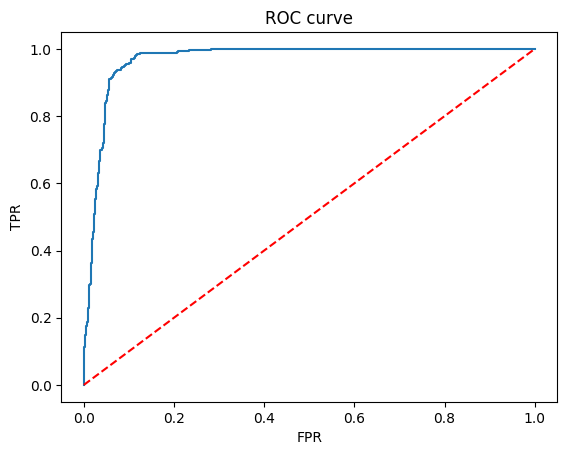

In [ ]:
plt.plot(fpr,tpr)

#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
# AUC
roc_auc_score(y_test,probabilites)

0.9689813348349934

## **issue with AU-ROC**

**observe**

We get an AU-ROC value of 97.8%
- showing that the model is performing very good

But recall our F1 Score was just 88%
- which made us believe our model was a decent one

<br>

#### Why a huge difference in model performance when using AU-ROC and F1 score ?
ans: Recall our data is imbalance:(70% $\rightarrow$ class 0 and 30% $\rightarrow$ class1):

- ROC curves provide an aggregate measure of model performance across all possible classification thresholds.

- Hence it can make a **poor model on the minority class appear better**
 - by focusing more on the performance on the majority class.

<br>

**Note:** When data is highly imbalanced,
- AU-ROC is not prefered

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/044/107/original/Screenshot_2023-08-24_at_10.24.54_AM.png?1692853066 width=700>

```
If data contains 50 spam and 300 non-spam samples, then which is true?
a) ROC may overestimate the model's performance.
b) ROC may underestimate the model's performance.
c) ROC does provide useful information.
d) ROC cannot be created
```
**Correct Answer**

a) ROC may overestimate the model's performance.

# **Precision - Recall curve**

#### What can be used instead of AU-ROC curve, when data is imbalanced ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/252/original/Screenshot_2023-08-08_at_11.41.18_AM.png?1691476974 width=700>



Ans: Since F1 score works well for imbalance data:
- We take **Precision and Recall values for every probability** instead of TPR and FPR

<br>

Rest of the approach remains same as AU-ROC

**Note:** Finding area under the curve of Precision and recall is called **AU-PRC**

**Quiz**

```
Which evaluation metric can be directly derived from the AUC-PRC?
a) Accuracy
b) F1 score
c) Precision
d) Recall
```

**Correct Answer** b) F1 score

**Explanation**
As we have precision and recall for each threshold:
- We can find F1-Score for the same

# **Precision Recall curve code**

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
precision, recall, thr = precision_recall_curve(y_test, probabilites)

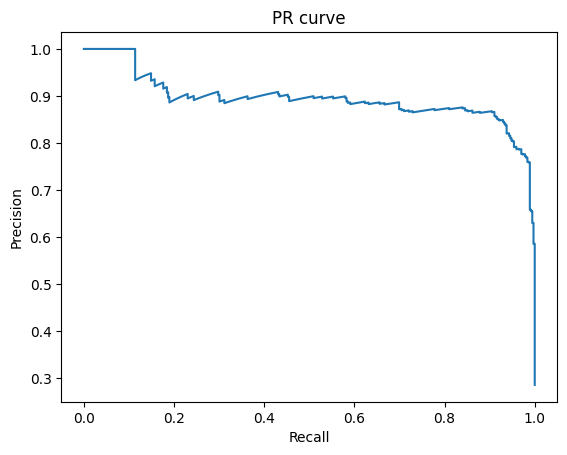

In [ ]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)

0.8943679356861058

**observe**

Now the **AU-PRC** comes close to F1 score
- Showing that **PRC** worked just fine in imbalanced data




Some extra information for classification Metrics in PostRead:

- [Lift and Chart, Cheatsheet for Metrics, metric vs loss](https://colab.research.google.com/drive/1WadYQgslAmgSqSu9ZMcGoWSNp7HkEGln?usp=drive_link)


# **Imbalance Data**

Even though ,AU-PRC = 90%, still the Logistic Regression model haven't increased performance
- and we know its because of the imbalance in data

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/253/original/Screenshot_2023-08-08_at_11.41.27_AM.png?1691477017 width=700>

#### When do we say that data is imbalanced ?
Ans: when the **number of samples of a class exceeds** the number of samples of the other class:
1. if there is a 70-30% Class sample ratio → **slightly imbalanced**

2. if there is a 80-20%/90-10% Class sample ratio → **imbalanced**

3. if there is a 95-5% Class sample ratio → **extremely imbalanced**


<br>

**Note:**
- The class which has **more number of samples → Majority Class**
- The class which has **less number of samples → Minority Class**




**Quiz**

```
Which among the following is a balanced data ?

a) 50 -ve samples, 50 +ve samples
b) 100 -ve samples, 10 +ve samples
c) 10 -ve samples, 100 +ve samples
d) 2 -ve samples, 98 +ve samples
```

**Correct Answer**
a) 50 -ve samples, 50 +ve samples


**Quiz**

```
For our Spam Classifier problem, which is majority class ?

a) Spam
b) Non-Spam
```
**correct Answer**
b) Non-Spam

# **Imbalance Data with Logistic Regression**



##(Optional)

#### What happens to Logistic Regression when data is balanced ?


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/254/original/Screenshot_2023-08-08_at_11.41.35_AM.png?1691477060 width=700>

Ans: Recall that **Logistic Regression creates a hyperplane**($\pi: y = w^Tx+w_0$):
- That classify the data into +ve (spam) and -ve (non-spam) classes

This hyperplane is achieved:
- When **Gradient Descent finds optimized weights**($w,w_0$) for the hyperplane



#### What happens to Logistic Regression when data is imbalanced ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/255/original/Screenshot_2023-08-08_at_11.41.43_AM.png?1691477111 width=700>

Ans: recall that in the logloss function, we use probability of model($p = P(y=1|X)$):

- Which is the probability of the features $X$  to have a class label = 1

This could also mean:
- how confident, Logistic regression is, in predicting that the class label for this sample is Class 1

<br>

Suppose we have two negative class points such that:

1. for Point1, model probability: $p^{(1)} = 0.5$

2. for Point2, model probability: $p^{(2)} = 0.1$

Then logloss for each point becomes:
1. $logloss = -(1-0) \times log(1-0.5) = 0.301 $

2. $logloss = -(1-0) \times log(1-0.1) = 0.045 $


**observe**

Clearly we can see:
1. When model probability $p^{(2)} = 0.1$:
- **the model is confident** that the point does not belong to Class1
- then **the Logloss value is very small**

- As opposed to **when model is uncertain( $p^{(1)} =0.5$), logloss is comparatively higher**


<br>










# **Model Confidence**

**quiz** (what do you think)

```
When is the model more confident ?

a) Point is close to the hyperplane
b) Point is far away from hyperplane

```
**Correct Answer**
b) Point is far away from hyperplane

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/257/original/Screenshot_2023-08-08_at_11.41.59_AM.png?1691477143 width=700>

Model is more confident, when point lies away from its hyperplane:
- Hence **both the +ve and -ve samples pushes the hyperplane** away from them

Therefore **the optimal hyperplane is in between the +ve and -ve samples**
- when data is balanced

<br>



#### Where does hyperplane go when data is imbalanced ?



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/259/original/Screenshot_2023-08-08_at_12.17.10_PM.png?1691477255 width=700>

Ans: Clearly, the majority class samples dominates:
- Hence it pushes the hyperplane away from them
- making the hyperplane be close to the minority class



**Thus making the new hyperplane uncertain for predicting minority class**


# **Handling Imbalance Data**


## **Class Weight**

We know data imbalance can be the cause for hindering the performance of our model,

#### How to make imbalance data balanced ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/261/original/Screenshot_2023-08-08_at_12.17.27_PM.png?1691477378 width=700>

Ans: Suppose we have 1000 data sample such that:

1. Spam email $\rightarrow$ 150
2. Non-Spam email $\rightarrow$ 850

**observe**

Non-spam Emails ($  \frac{850}{150} = 5.67 $) times more than Spam emails

<br>


#### How to make Spam email samples be equivalent to Non-Spam email samples ?

Ans: By giving a weightage to Spam datapoints such that:
1. A single Spam datapoint $ =  5.67$  Non-spam datapoint
  - Meaning if there are **3 spam datapoints**, it is equivalent of having **$3\times 5.67 \approx 18$ non-spam datapoint**

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/262/original/Screenshot_2023-08-08_at_11.42.42_AM.png?1691477430 width=700>





<br>


#### Where should this weightage parameter be added to in the model ?
Ans: Since Imbalance data effects the logloss the most,
- We add this weightage parameter ($W_i$) to the loss function such that:

  - $Loss = \frac{1}{n}[\sum_{i=1}^{n} logloss_i \times W_i + \lambda \sum_{j=1}^{d} w_j^2 ]$

<br>

Here:
-  $W_i = 5.67$ for +ve class samples (Minority class)
-  $W_i = 1$ for -ve class samples (Majority class)

**note** This **weightage parameter($W_i$) is called Class weight**



**quiz**

```
Why are class weights important in imbalanced datasets?
a) They improve the convergence speed of the model
b) They reduce overfitting in the model
c) They help give more importance to the minority class
d) They enhance the model's ability to handle missing values

```
**Correct Answer**
c) They help give more importance to the minority class

## **Class weight Code**


Lets now see how its implemented in Sklearn for Logisitic Regression:




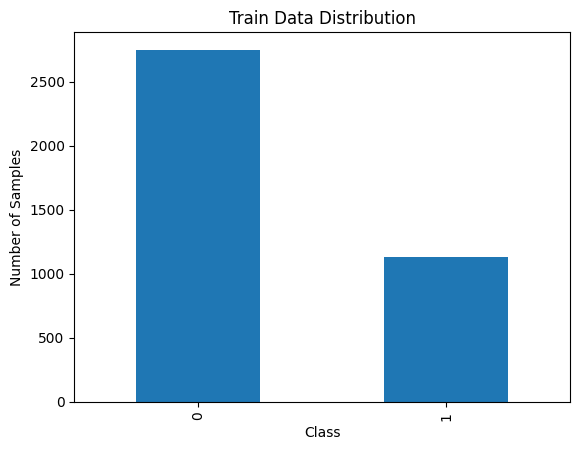

In [ ]:
y_train.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Train Data Distribution')
plt.show()

**observe**

The training data:
- Non-spam data = 2727
- Spam data = 1151

Hence weightage parameter becomes:
- $W_i = \frac{2727}{1151} = 2.37$

In [ ]:
# Model creation, prediction

def training(model,X_train,y_train,X_test,y_test):

  model.fit(X_train, y_train)

  train_y_pred = model.predict(X_train)
  test_y_pred = model.predict(X_test)

  train_score = f1_score(y_train, train_y_pred)
  test_score = f1_score(y_test, test_y_pred)

  return train_score,test_score


In [ ]:
# minority class needs more re-weighting


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression(class_weight={0:1,1:2.37})

f1_train,f1_test = training(model,X_train,y_train,X_test,y_test)
print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Training F1 score:0.8458349038823973, Testing F1 score:0.8449074074074073


**Observe**

how introducing Weighted-loss,
- did not do much change in F1-score

<br>


#### What can be the reason ?
Ans: lets check the confusion matrix

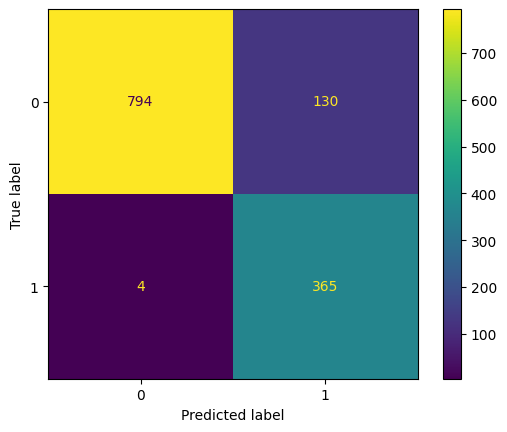

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(conf_matrix).plot()

**Observe**

Clearly, by introducing Class weights,
- Model has predicted many Non-Spam emails as Spam ($FP ⇑$)
- Hence the F1 score is low

**quiz**

```
What is the purpose of assigning higher weights to the minority class?
a) To achieve better generalization performance
b) To increase the number of samples in the minority class
c) To decrease misclassification of the minority class
d) To balance the training data distribution
```
**Correct Answer** c) To decrease misclassification of the minority class

# **Undersampling**

As we saw, introducing Class weights did not help much!

#### What can be done to make imbalance data balanced ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/263/original/Screenshot_2023-08-08_at_11.42.53_AM.png?1691477492 width=700>


Ans: Since Non-Spam samples are more in number,
- lets randomly drop these samples such that:
  - the number of Non-Spam data = number of Spam data

<br>

**Note**

This method of randomly dropping majority class sample is called **undersampling**



**Quiz** (what do you think)

```
Will dropping of majority class data cause any issue ?

a) Yes
b) No
c) Depends

```
**Correct Answer**
c) Depends


Clearly, dropping samples of data causes:
- Reduces the model reliability because now model of a **smaller training dataset**


#### When to use Undersampling ?

Ans: Typically used when the number of sample ($n$) is very large $\approx$ 1 Billion

# **Oversampling**



#### Since our data do not have $n \approx 1$Billion, we cannot use Undersampling, what else can we do ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/265/original/Screenshot_2023-08-08_at_11.43.00_AM.png?1691477522 width=700>



Ans: A data is balanced when there is equal number of samples for Class 0 and Class 1
- Instead of removing datapoints, lets **randomly select minority class samples**
- and **create dupilicate entry to increase the minority class**

<br>

**note:** This method of adding randomly selected minority class sample is called **Oversampling**

## **Understanding Oversampling**

Suppose there are 1000 samples such that:

- 850 samples are Non-Spam
- 150 samples are Spam

Clearly, we randomly select Spam class samples and create duplicate entries such that:

- Number of samples of Spam = 850

<br>






**Quiz** (what do you think)

```
What will be the total samples $n$ after oversampling Spam data ?

a) 1000
b) 1600
c) 1700
d) 850

```

**Correct Answer**

c) 1700

**explanation**

Spam sample = 850 and NonSpam sample = 850

hecne $n = 850 + 850 = 1700$


#**Oversampling code**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler()

# Perform oversampling on the training data
print('Before Oversampling')
print(y_train.value_counts())
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

print('After Oversampling')
print(y_train_oversampled.value_counts())

model = LogisticRegression()

f1_train,f1_test = training(model,X_train_oversampled, y_train_oversampled,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Before Oversampling
label_num
0    2748
1    1130
Name: count, dtype: int64
After Oversampling
label_num
0    2748
1    2748
Name: count, dtype: int64
Training F1 score:0.9279401767505099, Testing F1 score:0.8439306358381504


**Observe**

Training F1 Score is much higher than testing F1 Score

<br>

#### What can be said when training performance > testing performance ?

Ans: Model Overfits
- This means if we add same repitive samples of minority class, **it can lead to overfitting**




**QUIZ** (what do you think)

```

Can oversampling be applied to both binary and multi-class classification problems?
a) Yes
b) No

```
**ANSWER**
a) Yes



#### Why does model overfits in oversampling technique ?



Ans: because oversampling just **repeats samples**
- This makes the model to over learn patterns

<br>

#### What can be a smarter approach for oversampling ?
Ans: Instead of repeating the samples:
- Lets create **synthetically new samples** for our minority class label

- This approach will provide new samples to the model so it does not over learns any patterns

<br>




# **SMOTE (Synthetically Minority Oversampling Technique)**


#### How to create synthetic samples ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/267/original/Screenshot_2023-08-08_at_11.43.08_AM.png?1691477611 width=700>

Suppose from our Spam data:
- We randomly select a class1 label sample $x^{(1)}$

Now we find **Euclidean distance between this sample$x^{(1)}$ and all the remaining samples**:
- Pick the nearest 3 Class 1 label samples $x^{(5)},x^{(20)},x^{(10)} $


We then randomly choose a number between $[0,1]$, lets call it $ϕ$:
1. and multiply it with each of the Euclidean distances and add it to $x^{(1)}$

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/042/268/original/Screenshot_2023-08-08_at_11.43.16_AM.png?1691477645 width=700>



 - $x^{(new1)} = x^{(1)} +ϕ \times dist(x^{(1)},x^{(5)})$
 - $x^{(new2)} = x^{(1)} +ϕ \times dist(x^{(1)},x^{(20)})$
 - $x^{(new3)} = x^{(1)} +ϕ \times dist(x^{(1)},x^{(10)})$

This creates three new synthetic datapoints for our minority class

<br>

**Note:** This approach of creating new synthetic datapoint is called **SMOTE
(Synthetically Minority Oversampling Technique)**

<img src="https://drive.google.com/uc?id=16IjdHQqcddwUOtbOzVYrQufofftbOReZ" width="700" height="200">

Image shows briefly how  **SMOTE** creates data

**QUIZ**

```
Does SMOTE use linear combinations of  minority class samples ?

A) True
B) False
```

**ANSWER**

B) False


#**[SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) Code**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()


# Perform SMOTE on the training data
print('Before SMOTE')
print(y_train.value_counts())

X_sm, y_sm = smt.fit_resample(X_train, y_train)
print('After Oversampling')
print(y_train_oversampled.value_counts())

model = LogisticRegression(C= 5, penalty= 'l1', solver = 'liblinear')

f1_train,f1_test = training(model,X_sm, y_sm,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')



Before SMOTE
label_num
0    2748
1    1130
Name: count, dtype: int64
After Oversampling
label_num
0    2748
1    2748
Name: count, dtype: int64
Training F1 score:0.9551974499734373, Testing F1 score:0.9054224464060528


**Observe**

With SMOTE:
- The model performed the best reaching a test F1score of 91.47%

**quiz**(What do you think)

```
Are there any limitations or potential drawbacks to using SMOTE?

a) SMOTE can increase the risk of underfitting
b) SMOTE introduces noise and may not work for high-dimensional features
c) Cannot use F1-score, Accuracy or any metric after using SMOTE
d) SMOTE has no limitations
```
**Correct Answer**
b) SMOTE introduces noise and may not work for high-dimensional features

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/044/107/original/Screenshot_2023-08-24_at_10.24.54_AM.png?1692853066 width=700>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/044/108/original/Screenshot_2023-08-24_at_10.25.16_AM.png?1692853151 width=700>

# **Next Lecture Quiz**

**QUIZ**

```
which of the following should be prefered for Imbalance data when we want to give equal importance to all TP, FP, FN, TN ?

a. F1-Score
b. Accuracy
c. Precision
d. Recall

```
**Answer**

a. F1-Score

**Quiz**

```

What is one potential drawback of using SMOTE?
a) Increase the risk of overfitting on the minority class.
b) Introduce noise or unrealistic instances into the dataset.
c) It requires a large amount of computational resources.
d) It can only be applied to categorical features.

```

**Correct Answer**
b) Introduce noise or unrealistic instances into the dataset.

**QUIZ**

```
Which of the following is true, regarding ROC curve?

a. The curve is always concave
b. The curve is never concave
c. The curve may or may not be concave

```

**Answer**
c. The curve may or may not be concave

**Explanation**

An ROC curve can be concave, convex, or a mix of those on different segments,
- The x-axis of the ROC curve is false positive rate, the y-axis is true-positive rate which is ideally a concave curve.

- Convex ROC curves would mean TPR low initially,
- and then suddenly reaches 1

**quiz**
```
Airtel has 300 churn and 500 non-churn customers, which is true?

a) Accuracy is a good metric
b) AU-ROC is a good metric
c) Au-PRC is a good metric
d) Adj-R^2 is a good metric
```

**Correct Answer:** c) Au-PRC is a good metric


**Quiz**

```
Are class weights applicable only to binary classification problems?
a) Yes, class weights are only relevant in binary classification
b) No, class weights can be used in multi-class classification as well
c) Class weights are exclusive to regression tasks
d) Class weights are only useful in clustering algorithms
```
**correct Answer** b) No, class weights can be used in multi-class classification as well

**quiz**

```
Which evaluation metric should be considered when using undersampling?
a) Accuracy
b) Precision
c) Recall
d) All of the above
```
**Correct Answer** d) All of the above